### Unsupervised Machine Learning
Assignment #3 <br>
Basic Sequential Clustering Algrorithm <br>
Michael Zwartz<br>

#### Technical Description
Basic Sequential Clustering (BSCA) is a very simple clstering method. Hence the "basic" in its name. In unsupervised machine learning clustering is a important technique to group together instances to sort new data or extract significant features. There are many variants of BSCA that change based on the user defined distance measurment used, threshold of dissimilarity, and maximum # of clusters. The main process for BSCA is to first find the distance between a cluster center and each instance. If that distance is greater than the user defined threshold and the maximum number of clusters has not been reached then BSCA will create a new cluster. If the distance is less than the threshold or the maximum number of clusters has been reached then BSCA will add that instance into the cluster and recalculate the center.

#### Design of Algorithm
There are only a few steps to the basic sequential clustering algorithm. 
1. Define the parameters for threshold of dissimilarity and maximum number of clusters. 
2. Iterate through each instance to determine the dissimilaity to each cluster. 
3. Assign that instance to a cluster. 
4. Create a plot displaying the clusters. 


#### Results and Analysis

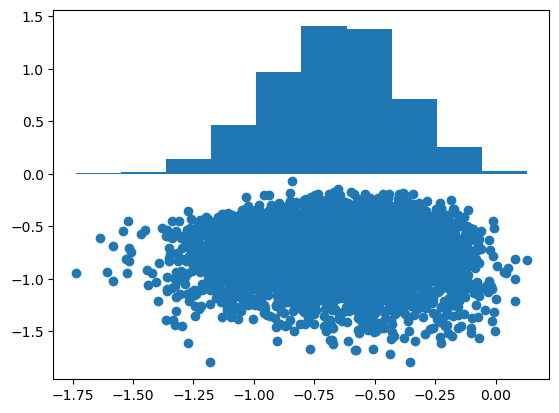

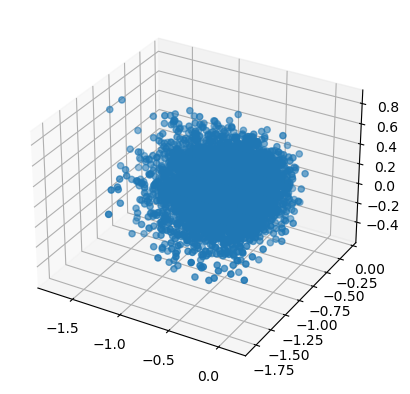

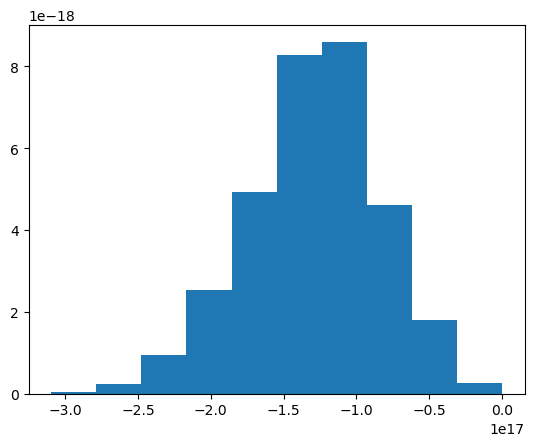

In [2]:
#import libraries
import pandas as pd
import numpy as np
from statistics import mean 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

#import LDA and PCA data
from PCAandLDA import PCA_batStats, batStats1D_LDA1, batStats2D_PCA

#add 1D array to bat_stats dataframe
data = batStats1D_LDA1.astype(float)

data2D = batStats2D_PCA

Clustering with 1D Data from LDA

In [3]:
#USER PRARAMETERS DEFINED
#m = max number of clusters set by user
m=3
#a = alpha, threshold of dissimilarity set by user
a=1

#load data set
LDA_1D = data.to_frame(name="LDA1")

#t = counter, counts number of iterations or clusters created
t=1

#initialize cluster dictionary
clusters_LDA = dict(zip(range(m), [[] for i in range(m)]))

#assign the first data point to cluster 1
clusters_LDA[0].append(LDA_1D.LDA1[0])


#iterate through data points after the first one
for row in LDA_1D.LDA1[1:]:
#add at least 1 data point to each cluster   
#if counter is less than max clusters aka not all clusters have been instantiated
    c=0 
    currentclusters=t
    distance = dict(zip(range(currentclusters), [[] for i in range(currentclusters)]))
    
    for c in range(currentclusters):
        distance[c].append(abs(row-np.mean(clusters_LDA[c])))
    
    shortest_dist=min(distance.values())
    closest_cluster=list(distance.keys())[list(distance.values()).index(shortest_dist)]
    
    if t<m and shortest_dist[0] >a:
        print('cluster ' + str(c+1) + ' is made')
        clusters_LDA[currentclusters].append(row)
        t=t+1
    #after all clusters have at least one data point sort the rest of the data point by choosing cluster with closest centroid
    else:  
        clusters_LDA[closest_cluster].append(row)

#print cluster array
#clusters_LDA[c]


c_df=pd.DataFrame()
for c in clusters_LDA:
    for i in clusters_LDA[c]:
        c_df=c_df.append({'Value': i, 'Cluster': c}, ignore_index=True)





cluster 1 is made
cluster 2 is made


In [4]:
#create 1D Plot with clusters 
fig=go.Figure()

fig=px.histogram(x=c_df.Value, color=c_df.Cluster, 
               title="BSCA with 1D LDA BatStats Data:  alpha=" + str(a) + ", max clusters=" + str(m))

fig.update_layout(coloraxis_colorbar=dict(
    title="Clusters",
    tickvals=[0,1,2,3, 4],
    ticktext=["c1","c2","c3","c4", "c5"],
    lenmode="pixels", len=500,
))

#fig.add_trace(go.scatter(x=clusters[1], y=range(len(clusters[0]))))
fig.write_html('result1.html', auto_open=True)

Clustering with 2D Data from PCA

In [5]:
#USER PRARAMETERS DEFINED
#m = max number of clusters set by user
m=3
#a = alpha, threshold of dissimilarity set by user
a=1

#define distance measurment
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

#load data set
PCA_2D = pd.DataFrame(data2D, columns = ['PCA1', 'PCA2'])

#t = counter, counts number of iterations or clusters created
t=1

#initialize cluster dictionary
clusters_PCA = dict(zip(range(m), [[] for i in range(m)]))

#assign the first data point to cluster 1
clusters_PCA[0].append(PCA_2D.loc[0])


In [11]:
np.linalg.norm(PCA_2D.loc[0]-PCA_2D.loc[1])

0.1554757627747903

In [6]:
#iterate through data points after the first one
for row in PCA_2D.iterrows():
#add at least 1 data point to each cluster   
#if counter is less than max clusters aka not all clusters have been instantiated
    c=0 
    currentclusters=t
    distance = dict(zip(range(currentclusters), [[] for i in range(currentclusters)]))
    
    for c in range(currentclusters):
        #find distance for each cluster using euclidean distance
        distance[c].append(np.linalg.norm(row - np.mean(clusters_PCA[c])))
    
    shortest_dist=min(distance.values())
    closest_cluster=list(distance.keys())[list(distance.values()).index(shortest_dist)]
    
    if t<m and shortest_dist[0] >a:
        print('cluster ' + str(c+1) + ' is made')
        clusters_LDA[currentclusters].append(row)
        t=t+1
    #after all clusters have at least one data point sort the rest of the data point by choosing cluster with closest centroid
    else:  
        clusters_PCA[closest_cluster].append(row)

#print cluster array
clusters_LDA[c]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [194]:
c_df2=pd.DataFrame()
for c in clusters_PCA:
    for i in clusters_PCA[c]:
        c_df2=c_df2.append({'Value': i, 'Cluster': c}, ignore_index=True)

cluster 1 is made


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [92]:
#Create 2D plot with clusters
#create 1D Plot with clusters 
fig2=go.Figure()

fig2=px.scatter(x=c_df2.Value, color=c_df2.Cluster, 
               title="BSCA with 2D PCA BatStats Data:  alpha=" + str(a2) + ", max clusters=" + str(m2))

fig.update_layout(coloraxis_colorbar=dict(
    title="Clusters",
    tickvals=[0,1,2,3, 4],
    ticktext=["c1","c2","c3","c4", "c5"],
    lenmode="pixels", len=500,
))

#fig.add_trace(go.scatter(x=clusters[1], y=range(len(clusters[0]))))
fig.write_html('result2.html', auto_open=True)

#### Analysis
Something something something